In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [143]:
# Agregar el dataset 'survey_results_public.csv' en el directorio data/
df = pd.read_csv('data/survey_results_public.csv')

In [144]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [146]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [147]:
ATTRS = ['Age', 'MainBranch', 'CompFreq', 'ConvertedComp', 'Country', 'DevType', 
           'EdLevel', 'Employment', 'JobSeek', 'NEWOnboardGood', 
           'NEWOvertime', 'OrgSize', 'WorkWeekHrs', 'YearsCodePro',
          'JobSat']

df = df[ATTRS]

In [148]:
# Only developers by profession.
df = df[df['MainBranch'] == 'I am a developer by profession']
df.drop('MainBranch', 1, inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47193 entries, 0 to 64159
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             34348 non-null  float64
 1   CompFreq        36310 non-null  object 
 2   ConvertedComp   31581 non-null  float64
 3   Country         47008 non-null  object 
 4   DevType         41733 non-null  object 
 5   EdLevel         42781 non-null  object 
 6   Employment      46930 non-null  object 
 7   JobSeek         40376 non-null  object 
 8   NEWOnboardGood  38498 non-null  object 
 9   NEWOvertime     39032 non-null  object 
 10  OrgSize         40048 non-null  object 
 11  WorkWeekHrs     37203 non-null  float64
 12  YearsCodePro    41087 non-null  object 
 13  JobSat          40764 non-null  object 
dtypes: float64(3), object(11)
memory usage: 5.4+ MB


### JobSat

In [150]:
# Class in 2 buckets.
# ["Slightly satisfied", "Very satisfied"] -> 1
# ["Very dissatisfied", "Slightly dissatisfied"] -> 0
def job_sat(row):
    job_sat = row["JobSat"]
    sat_labels = ["Slightly satisfied", "Very satisfied"]
    not_sat_labels = ["Very dissatisfied", "Slightly dissatisfied"]
    if isinstance(job_sat, str):
        if job_sat in sat_labels:
            return 1
        elif job_sat in not_sat_labels:
            return 0
        
df['JobSat'] = df.apply(job_sat, axis = 1)
# Drop if JobSat (class) is null.
df.dropna(subset = ["JobSat"], inplace=True)

<AxesSubplot:title={'center':'Cantidad de personas en cada nivel de satisfacción'}>

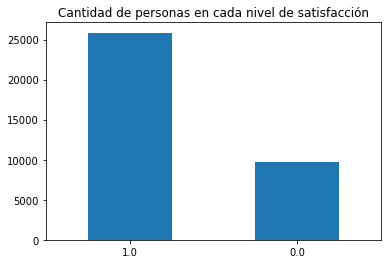

In [151]:
df['JobSat'].value_counts().plot(kind = 'bar', rot=0, title='Cantidad de personas en cada nivel de satisfacción')

### Age

In [152]:
# Age procces
df[df['Age'] > 100] = None
df[df['Age'] < 16] = None

### CompFreq

In [153]:
df['CompFreq'].value_counts()
df.dropna(subset = ["CompFreq"], inplace=True)

### ConvertedComp

In [154]:
# Esta ok hay algunos casos medio raro de 1M y 2M de USD.

### Country

In [155]:
# Que carajos hacemos aca. :)

### DevType

In [156]:
# DevType proccess.
# TOP 6 types.
# Developer, back-end
# 55.2%
# Developer, full-stack
# 54.9%
# Developer, front-end
# 37.1%
# Developer, desktop or enterprise applications
# 23.9%
# Developer, mobile
# 19.2%
# DevOps specialist
DEV_TYPES = ['Developer, back-end', 'Developer, full-stack', 'Developer, front-end',
    'Developer, desktop or enterprise applications', 'Developer, mobile', 'DevOps specialist']

for dev_type in DEV_TYPES:
    t = dev_type.replace('-', ' ').split(' ')
    t = ''.join([x.capitalize() for x in t]).replace(',', '')
    
    df['DevType' + t] = np.where(df['DevType'].str.contains(dev_type), 1, 0)

df['DevTypeOther'] = np.where(
    (df['DevTypeDeveloperBackEnd'] == 0) & (df['DevTypeDeveloperFullStack'] == 0)
    & (df['DevTypeDeveloperFrontEnd'] == 0) & (df['DevTypeDeveloperDesktopOrEnterpriseApplications'] == 0) &
    (df['DevTypeDeveloperMobile'] == 0) & (df['DevTypeDevopsSpecialist'] == 0), 
    1, 0)

df.drop('DevType', 1, inplace=True)

### EdLevel

In [157]:
def ed_level(row):
    ed_level = row["EdLevel"]
    master_level = ["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)", "Other doctoral degree (Ph.D., Ed.D., etc.)"]
    university_level = ["Bachelor’s degree (B.A., B.S., B.Eng., etc.)", "Some college/university study without earning a degree", "Associate degree (A.A., A.S., etc.)", "Professional degree (JD, MD, etc.)"]
    school = ["Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "Primary/elementary school"]
    if isinstance(ed_level, str):
        if ed_level in master_level:
            return "Master/Doctoral"
        elif ed_level in university_level:
            return "University"
        elif ed_level in school:
            return "School"
        return "Any education"
        
df['EdLevel'] = df.apply(ed_level, axis = 1)
df.dropna(subset = ["EdLevel"], inplace=True)

In [158]:
df['EdLevel'].value_counts()

University         20902
Master/Doctoral     8649
School              1457
Any education        171
Name: EdLevel, dtype: int64

### Employment

In [159]:
df['Employment'].value_counts()

Employed full-time                                      27472
Independent contractor, freelancer, or self-employed     2767
Employed part-time                                        903
Name: Employment, dtype: int64

In [160]:
df['Employment'].value_counts()

def clasificar_employment(row):
    employment = row['Employment']
    if isinstance(employment, str):
        if employment == "Employed full-time":
            return "FullTime"
        elif employment == "Independent contractor, freelancer, or self-employed":
            return "Freelance"
        return "PartTime"

df['Employment'] = df.apply(clasificar_employment, axis = 1)

In [161]:
df = df[df['Employment'] != "Freelance"]
df.drop('Employment', 1, inplace=True)

### JobSeek

In [162]:
df['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    15852
I am not interested in new job opportunities                     8187
I am actively looking for a job                                  3365
Name: JobSeek, dtype: int64

In [163]:
def clasificar_jobseek(row):
    seek = row['JobSeek']
    if isinstance(seek, str):
        if "I’m not actively looking" in seek:
            return "NoButOpenToOpportunities"
        elif "I am not interested in new job opportunities" in seek:
            return "No"
        return "Yes"

df['JobSeek'] = df.apply(clasificar_jobseek, axis = 1)
df['LookingForJob'] = df['JobSeek']
df.drop('JobSeek', 1, inplace=True)
df.dropna(subset = ["LookingForJob"], inplace=True)

In [164]:
df['LookingForJob'].value_counts()

NoButOpenToOpportunities    15852
No                           8187
Yes                          3365
Name: LookingForJob, dtype: int64

### NEWOnboardGood

In [165]:
df['NEWOnboardGood'].value_counts()

Yes                             14203
No                               7903
Onboarding? What onboarding?     4995
Name: NEWOnboardGood, dtype: int64

In [166]:
df[df['NEWOnboardGood'] == "Onboarding? What onboarding?"] = None

In [167]:
df['NEWOnboardGood'].value_counts()

Yes    14203
No      7903
Name: NEWOnboardGood, dtype: int64

In [168]:
df.dropna(subset = ["NEWOnboardGood"], inplace=True)

### NEWOvertime

In [169]:
df['NEWOvertime'].value_counts()

Sometimes: 1-2 days per month but less than weekly          6019
Occasionally: 1-2 days per quarter but less than monthly    5167
Often: 1-2 days per week or more                            4846
Rarely: 1-2 days per year or less                           3567
Never                                                       2444
Name: NEWOvertime, dtype: int64

In [170]:
def clasificar_overtime(row):
    overtime = row['NEWOvertime']
    if isinstance(overtime, str):
        if "1-2 days per month but less than weekly" in overtime:
            return "Sometimes"
        elif "1-2 days per week or more" in overtime:
            return "Often"
        elif "1-2 days per quarter but less than monthly" in overtime:
            return "Occasionally"
        elif "1-2 days per year or less" in overtime:
            return "Rarely"
        return "Never"

df['NEWOvertime'] = df.apply(clasificar_overtime, axis = 1)

In [171]:
df['NEWOvertime'].value_counts()

Sometimes       6019
Occasionally    5167
Often           4846
Rarely          3567
Never           2444
Name: NEWOvertime, dtype: int64

In [172]:
df.dropna(subset = ["NEWOnboardGood"], inplace=True)

### OrgSize

In [173]:
df['OrgSize'].value_counts()

20 to 99 employees                                    5014
100 to 499 employees                                  4635
10,000 or more employees                              3409
1,000 to 4,999 employees                              2698
10 to 19 employees                                    1950
500 to 999 employees                                  1632
2 to 9 employees                                      1442
5,000 to 9,999 employees                               964
Just me - I am a freelancer, sole proprietor, etc.      57
Name: OrgSize, dtype: int64

In [174]:
def org_size(row):
    size = row['OrgSize']
    if isinstance(size, str):
        if "I am a freelancer" in size:
            return None
        return size.replace('employees', '').replace(' to ', '-').replace(' ', '').replace(',', '.')

#         size_range = size_range.split('-')
#         if size_range[0] == "10,000 or more ":
#             n1 = 1000000
#         else:
#             n1 = int(size_range[0].replace(',', ''))
#             print(n1)
            
#         if n1 < 100:
#             return 'Small'
#         elif n1 < 1000:
#             return 'Medium'
#         return 'Big'


df['OrgSize'] = df.apply(org_size, axis = 1)

In [175]:
df['OrgSize'].value_counts()
df.dropna(subset = ["OrgSize"], inplace=True)

20-99           5014
100-499         4635
10.000ormore    3409
1.000-4.999     2698
10-19           1950
500-999         1632
2-9             1442
5.000-9.999      964
Name: OrgSize, dtype: int64

### WorkWeekHrs

In [176]:
# 16 hs * 7 days
df['WorkWeekHrs'] = df['WorkWeekHrs'].apply(lambda x: None if x >= 112 else x)

In [177]:
df['WorkWeekHrs'].value_counts()

40.0     10784
45.0      1998
50.0      1194
35.0      1069
38.0       780
         ...  
98.0         1
68.0         1
17.0         1
110.0        1
39.5         1
Name: WorkWeekHrs, Length: 113, dtype: int64

### YearsCodePro

In [178]:
# More than 50 years --> 51
df.YearsCodePro = [0.5 if x == "Less than 1 year" else 51 if x == "More than 50 years" else x for x in df.YearsCodePro]

### JobSat

In [179]:
# Country
df.dropna(subset = ["Country"], inplace=True)
TOP_COUNTRIES = df['Country'].value_counts().index[:25]
def country(row):
    country = row['Country']
    if isinstance(country, str):
        if country in TOP_COUNTRIES:
            return country
        else:
            return 'Other'

df['Country'] = df.apply(country, axis = 1)

In [180]:
# Set class as last col.
CLASS = 'JobSat'
aux = df[CLASS]
df.drop(CLASS, 1, inplace=True)
df[CLASS] = aux

In [181]:
# j0 = df[df['JobSat'] == 0]
# j1 = df[df['JobSat'] == 1].sample(5751)

# df = pd.concat([j0, j1])

In [182]:
df.to_csv('20feb.csv', index=False)